<a href="https://colab.research.google.com/github/ghisford/Machine_learning/blob/main/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Training a perceptron to do a Classification Task
1. A perceptron is one of the simplest Artificial Neural networks

 1. it contains a summation and activation function
 2. inputs are the features
 3. The weighted sum determines the strength of connections and determines the output value(not a probability)
 4. step functions used mostly are heaviside function and sign function.

2. It is based on an artificial neuron called a Threshold Logic Unit(TLU) or Linear Threshold Unit. all the TLUs that make up the perceptron are fully connected
3. It uses a step function instead of a logistic regression function
4. the commonest step function in perceptrons is the heaviside step function.
5. Other times the sign function is used instead

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame= True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target== 0)

per_clf = Perceptron(random_state= 42)
per_clf.fit(X, y)

X_new = [[1, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

1. Unlike logistic regression, perceptrons do not output class probabilities, a reason to prefer logistic regression.
2. Perceptrons may train a little faster
3. Perceptrons might be more prone to overfitting since they arent regularized and their training stops the moment the prediction error on the dataset is zero.
4. The decision boundary of each neuron is linear, so perceptrons are incapable of learning complex patterns- Unless the features are linearly separable, then Rosenblatt demonstrated that this algorithm would converge to a solution.- A theorem known as the Perceptron convergence theorem


## The Multilayer Perceptron and Backpropagation
consists of:
1. One input layer
2. One or more layers of TLUs called Hidden layers(lower and upper layers)
3. one final output layers

# Neural Networks
1. Deep Neural and shallow neural networks
2. Initialize all the connections weights of the hidden layers randomly so that they dont end up into one layer.
3. reverse-mode automatic differentiation
4. Backpropagation ie. measure how much of these errors came from each connection in the layer below it.
5. sigmoid(0,1), hyperbolic tangent(-1,1), Rectified Linear Unit(0, infinity)
6. weights and biases of each layer updated using gradient descent

# Building a Multilayer Perceptron for a Regression problem

1. It will consist of 3 hidden layers
2. Each layer will have 50 neurons
3. The output layer will have 1 neuron since the predicted value is only one.ie price of the building.
4. Scaling features is extremely crucial since the training relies on gradient descent algorithm.
5. The model uses ReLU activation function in the hidden layers
6. It uses a version of gradient descent called Adam to minimize the mean squared error, plus a bit of l2 regularization (via the hyperparameter)

### splitting the data

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
X_train_full, X_test, y_train_full,y_test = train_test_split(housing.data,
                                                             housing.target, random_state= 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state= 42)

### Training the model

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes= [50,50,50], random_state= 42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared= False)

1. The MLPRegressor class uses the mean squared error- good choice
2. If we have a lot of outliers in the training set, we may prefer mean absolute error instead.
3. Or just use the Huber Loss, which is a combination of both
  1. It is quadratic when the error is smaller than a threshold(typically 1)
  2. But linear when the error is larger than threshold.

In [ ]:
# we get 0.505 which is comparable to the value gotten from a random forest classifier
rmse

0.5053326657968679

## Important note
1. This model does not use any activation function in its output layer. As a result, it outputs any value it wants.
2. Generally, its okay. But we only want positive prices and for that reason we shall use a ReLU activation func or a softplus activation func( smooth version of ReLU)
    1. softplus is close to zero when value(z) is -ve
    2. it is close to z if z is +ve
3. if you want the values to always fall within a certain range:  a. use sigmoid(0,1) or hyperbolic tangent(-1,1)  b. scale the targets to the appropriate range.

4. Using scikit-learn to build neural nets in a few lines is convinient but limiting interms of features we have access to. That is why we'll go to Keras later.

# Classification MLPs
1. A binary classifier will consist of just 1 output neuron using a sigmoid activation function
2. Output will be btn 0-1. Think about it as a probability of the +ve class. you know what to do to get the prob of the -ve class
3. They can also handle Mutlilabel binary classification tasks. eg spam or ham, urgent and not-urgent( one email can be both spam and not-urgent)
    1. You would need 2 neurons both using sigmoid activation for this one
    2. note that the probabilities for the 2 classes do not add up to 1. Each output is independent This lets the model to output any combination of labels
4. If each class can only belong to 1 class, then each class need an output neuron.
    1. The whole output layer will require a softmax activation function
    2. It will ensure that all outputs are btn 0-1 and that they add up to 1.
    3. This, ladies and gentlemen, is what we call multiclass classification

## Loss Function
Since we are predicting probability distributions, the cross-entropy is a good choice

### Training an MLPClassifier from sklearn.neural_network

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import numpy as np

iris = load_iris(as_frame = True)

X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0).astype(int) # convert to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

mlp_clf = MLPClassifier(hidden_layer_sizes= [50,50,50], random_state= 42)
mlp_clf.fit(X_train,y_train)

X_new = np.array([[1, 0.5], [3, 0.1]])

y_prob = mlp_clf.predict_proba(X_test)

# calculating log loss

loss = log_loss(y_test, y_prob)


loss
# Fuckin WOW that is a relatively small loss!

0.0019826372700932206

# Implementing MLPs with Keras
Keras and Tensorflow are happily married.One wont work without the other.
Also, we'll use the Fashion MNIST dataset. colab has them preinstalled but your IDE will need a fresh installation

## Building an image classifier Using the sequential API


## Loading data using keras
1. The dataset comes split into train and test sets
2. We are going to remove 5,000 instances from the train set to create the validation set

In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


## Differences in data representation under the hood.
keras: image is a 28 x 28 array
      : Pixel intensities are integers(0 - 255)

scikit learn: 1 x 784 array(1D array)
            : pixel intensities are floats(0.0 - 255.0)  

In [5]:
# checking the shape and datatype of the train set
X_train.shape

(55000, 28, 28)

In [6]:
X_train.dtype

dtype('uint8')

## Scaling the pixel intensities
We scale all sets that contain the features

In [3]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

For the Fashion MNIST we need a list of class names to know the names of the instances. We make sure they are the same. so this list of classnames is not random.

In [4]:
class_names = ["T-shirt/tip", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]
# y_train[0]

9

# **Creating the model using the sequential API**

### Hidden layers

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape= [28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation= "relu"))
model.add(tf.keras.layers.Dense(100, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "softmax"))

In [5]:
# another more convinient way to skin this same cat is to pass the list of layers
# when creating a sequential model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= [28, 28]),
    tf.keras.layers.Dense(300, activation= "relu"),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(10, activation= "softmax")
])

## The summary method
1. displays model's layers and names, shape(None means the shape can be anything), and its number of parameters.Summary ends with the total number of parameters. This includes trainable and non-trainable parameters.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## The Dense layers have a lot of parameters.
1. 784 x 300(connection weights) + 300(bias terms) = 235,500 parameters
2. This gives it the flexibility to fit the training data But also to overfit if the data is little.
3. Allow keras name the layers. it makes them unique across models so that there
arent any name conflicts when models are merged.
4. Always specify the input_shape bse the number of parameters depend on it.

In [16]:
# getting a list of the layers of the model using "layers" attribute
model.layers

In [22]:
# or use get_layer() method to access a layer's address
hidden1 = model.layers[1]
#  getting the name of the layer stored at that position
hidden1.name
# output: 'dense'
# checking whether the 2 objects are identical(occupy same memory location)
model.get_layer("dense") is hidden1

True

In [23]:
# getting the parameters(weights and biases) of a layer using the "get_weights()" and set_weights() methods
weights, biases = hidden1.get_weights()
weights
# Notice that the layer initialized the connection weights randomly which is
# needed to break symmetry.
# use kernel_initializer if you want to use a different method of initialization


array([[ 1.22443363e-02,  7.24657625e-02,  4.80433106e-02, ...,
        -1.31331794e-02, -6.74126223e-02, -1.68635361e-02],
       [-3.20654809e-02, -4.29520719e-02, -7.22041130e-02, ...,
         4.57987860e-02,  1.27706006e-02, -5.07416651e-02],
       [-3.62110138e-02,  4.26918715e-02, -7.37451464e-02, ...,
        -2.48345733e-03, -4.08971421e-02,  6.74963892e-02],
       ...,
       [-2.24947743e-02, -2.51596011e-02, -1.19369365e-02, ...,
         4.59834188e-02,  7.16703683e-02, -6.56470656e-05],
       [-5.68307340e-02,  7.62648135e-03,  5.18959612e-02, ...,
        -6.46120459e-02, -9.06471908e-03, -3.45457830e-02],
       [-7.26968944e-02,  5.02415821e-02, -5.35906143e-02, ...,
        -7.18618929e-03,  5.97420335e-02, -1.66833401e-03]], dtype=float32)

In [24]:
# 784 rows and 300 columns
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
# 300 rows of biases
biases.shape

(300,)

## Compiling the Model
1. After a model is created, we must call its compile() method to specify the loss function and the optimizer to use
2. Optionally, you can specify a list of extra metrics to compute during training and evaluation.

In [6]:
model.compile(loss= "sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.SGD(learning_rate= 0.01),
              metrics= ["accuracy"])
# it is better to specify your own learning rate and stop relying on the standard
# 0.01 of tensorflow(optimizer= 'sgd')

# optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)

we have used the sparse_categorical_crossentropy bse the target is just an index for the class it belongs to. and not a one-hot-encoded probability. Each class also happens to be exclusive

## Training and evaluating the model

In [7]:
history = model.fit(X_train, y_train, epochs= 30, validation_data= (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7000 - accuracy: 0.7693 - val_loss: 0.5037 - val_accuracy: 0.8290
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4852 - accuracy: 0.8314 - val_loss: 0.4738 - val_accuracy: 0.8318
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4397 - accuracy: 0.8461 - val_loss: 0.4304 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4152 - accuracy: 0.8549 - val_loss: 0.3974 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3947 - accuracy: 0.8619 - val_loss: 0.3940 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3784 - accuracy: 0.8667 - val_loss: 0.4050 - val_accuracy: 0.8610
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3654 - accuracy: 0.8703 - val_loss: 0.3757 - val_accuracy:

1. Training accuracy is 0.92 and validation accuracy is 0.88 which means there is a little bit of overfitting going on in the model.
2. Another way to create a validation set is to use the "validation_split= 0.2" which would use the last 20% of the training data for validation

## For skewed data
1. if our data has an underrepresented class, it would be usefull to set the "class_weight" argument when calling the fit()  method, to give a larger weight and lower weight accordingly. The classes would be used by keras when computing the weights
2. If there is a portion of data(say labelled by experts) that you would like keras to give more weight, set the "sample_weight" argument.

3. if both weights are provided, keras multiplies them.
4. You can also provide sample weights and not class weights for the validation set by adding them as a third item in the validation_data tuple.

## Visualize training details
1. the fit() method returns a History object containing the training parameters
    1. history.params - training parameters
    2. history.epoch - list of epochs it went through
    3. history.history - contains loss and extra training metrics measures the the end of each epoch on the training and validation sets

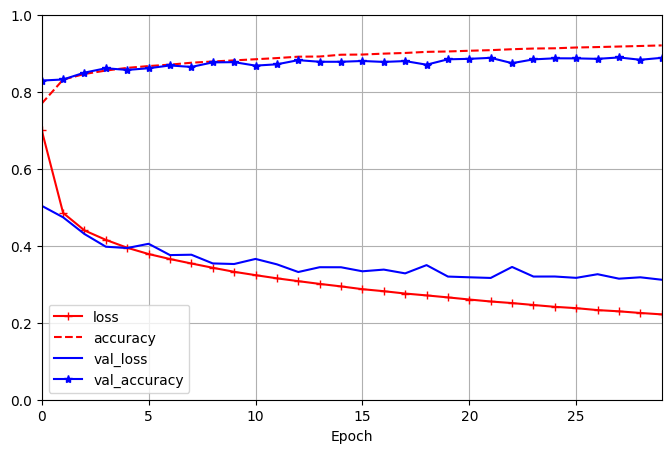

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize= (8, 5), xlim= [0, 29], ylim= [0, 1],
                                   grid= True, xlabel= "Epoch",
                                   style= ["r-+","r--","b-","b-*"])
plt.show()

## Key points
1. The validation accuracy is measured at the end of each epoch while the training accuracy is computed using a running mean during each epoch- the curves overlap perfectly if the training accuracy curve is shifted by half an epoch
2. You can tell that the model has not converged yet given that the validation loss is still going down town.
3. To continue the training,just call the fit() method and the keras will pick up from where it left off.
4. If you want to squeeze more juice from the model. Tune some hyperparameters   

    1.   Learning rate
    2.   Optimizer change
    3.   Number of layers
    4.   Number of neurons per layer
    5.   Type of activation func for each hidden layer
    6.   batch size - using the batch_size argument(default= 32)
